# CDC Data 1998-2015

### Effects on people in the US

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [85]:
occur_df = pd.read_csv('../data_files/dist_org_prep_1998_2015_CDC.csv')
occur_df.head()

,Year,Month,State,Genus Species,Serotype or Genotype,Etiology Status,Location of Preparation,Illnesses,Hospitalizations,Deaths,Food Vehicle,Contaminated Ingredient
0,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,2,0.0,0.0,NaN,NaN
1,2009,1,Minnesota,Norovirus,NaN,Confirmed,NaN,16,0.0,0.0,NaN,NaN
2,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,5,0.0,0.0,NaN,NaN
3,2009,1,Minnesota,Norovirus,NaN,Confirmed,"Restaurant - ""Fast-food""(drive up service or p...",3,0.0,0.0,NaN,NaN
4,2009,1,Minnesota,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,21,0.0,0.0,cookies,NaN


In [47]:
#Total number of illnesses reported in timeframe:

In [48]:
ill_obs = occur_df['Illnesses'].sum()
ill_obs

373531

In [49]:
#Total number of hospitalizations reported in timeframe:

In [50]:
hops_obs = occur_df['Hospitalizations'].sum()
hops_obs

14681.0

In [51]:
#Total number of deaths reported in timeframe:

In [52]:
death_obs = occur_df['Deaths'].sum()
death_obs

337.0

In [53]:
occur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19119 entries, 0 to 19118
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     19119 non-null  int64  
 1   Month                    19119 non-null  int64  
 2   State                    19119 non-null  object 
 3   Genus Species            12500 non-null  object 
 4   Serotype or Genotype     3907 non-null   object 
 5   Etiology Status          12500 non-null  object 
 6   Location of Preparation  17984 non-null  object 
 7   Illnesses                19119 non-null  int64  
 8   Hospitalizations         15494 non-null  float64
 9   Deaths                   15518 non-null  float64
 10  Food Vehicle             10156 non-null  object 
 11  Contaminated Ingredient  1876 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.8+ MB


In [54]:
#First, filter to get only the rows I want to change, then
#Remove all but first word in the column (Norovirus)
#occur_df['Genus Species'].filter(regex='^Norovirus$').str.replace(' ': '')
#occur_df.head(50)
#occur_df['Genus Species'] = occur_df['Genus Species'].str.replace('^Norovirus': '', regex=True)
#occur_df['Genus Species'] = occur_df['Genus Species'].str.strip('')
#occur_df.head(50)
#Specify what I want to get rid of instead of what I want to keep.

In [55]:
# occur_df['genus_species'] = ''
# for ind, row in occur_df.iterrows():
#     if re.search('^Banquet', row['Genus Species'])=='Banquet':
#         occur_df.loc[ind, 'genus_species'] = 'Banquet'
#     elif row['birth_order'] == 1:
#         people_df.loc[ind, 'birth_category'] ='oldest'
#     elif row['birth_order'] > row['sibling_count']:
#         people_df.loc[ind, 'birth_category'] ='youngest'
#     else:
#         people_df.loc[ind, 'birth_category'] ='middle'
# print('finished!')

### Re-grouping the 'Genus Species' column into a more usable form named 'caustative_agents'

In [86]:
norovirusmask = occur_df['Genus Species'].str.contains('Norovirus').fillna(False)
cryptosporidiummask = occur_df['Genus Species'].str.contains('Cryptosporidium').fillna(False)
amnesicmask = occur_df['Genus Species'].str.contains('Amnesic shellfish poison').fillna(False)
anisakismask = occur_df['Genus Species'].str.contains('Anisakis').fillna(False)
astrovirusmask = occur_df['Genus Species'].str.contains('Astrovirus').fillna(False)
salmonellamask = occur_df['Genus Species'].str.contains('Salmonella').fillna(False)
clostridiummask = occur_df['Genus Species'].str.contains('Clostridium').fillna(False)
escherichiamask = occur_df['Genus Species'].str.contains('Escherichia').fillna(False)
staphylococcusmask = occur_df['Genus Species'].str.contains('Staphylococcus').fillna(False)
campylobactermask = occur_df['Genus Species'].str.contains('Campylobacter').fillna(False)
shigellamask = occur_df['Genus Species'].str.contains('Shigella').fillna(False)
othervirusmask = occur_df['Genus Species'].str.contains('Other - Virus').fillna(False)
bacillusmask = occur_df['Genus Species'].str.contains('Bacillus').fillna(False)
hepatitisamask = occur_df['Genus Species'].str.contains('Hepatitis A').fillna(False)
cyclosporamask = occur_df['Genus Species'].str.contains('Cyclospora').fillna(False)
vibriomask = occur_df['Genus Species'].str.contains('Vibrio').fillna(False)
scombroidtoxinmask = occur_df['Genus Species'].str.contains('Scombroid').fillna(False)
otherchemtoxinmask = occur_df['Genus Species'].str.contains('Other - Chemical/Toxin').fillna(False)
otherbacteriummask = occur_df['Genus Species'].str.contains('Other - Bacterium').fillna(False)
ciguatoxinmask = occur_df['Genus Species'].str.contains('Ciguatoxin').fillna(False)
listeriamask = occur_df['Genus Species'].str.contains('Listeria').fillna(False)
giardiamask = occur_df['Genus Species'].str.contains('Giardia').fillna(False)
rotavirusmask = occur_df['Genus Species'].str.contains('Rotavirus').fillna(False)
histaminemask = occur_df['Genus Species'].str.contains('Histamine').fillna(False)
mycotoxinmask = occur_df['Genus Species'].str.contains('Mycotoxin').fillna(False)
brucellamask = occur_df['Genus Species'].str.contains('Brucella').fillna(False)
cleaningagentmask = occur_df['Genus Species'].str.contains('Cleaning agents').fillna(False)
enterobactermask = occur_df['Genus Species'].str.contains('Enterobacter').fillna(False)
enterococcusmask = occur_df['Genus Species'].str.contains('Enterococcus').fillna(False)
heavymetalsmask = occur_df['Genus Species'].str.contains('Heavy Metals').fillna(False)
monosodiumglutamatemask = occur_df['Genus Species'].str.contains('Monosodium').fillna(False)
neurotoxinshellfishmask = occur_df['Genus Species'].str.contains('Neurotoxin shellfish').fillna(False)
paralyticshellfishmask = occur_df['Genus Species'].str.contains('Paralytic shellfish').fillna(False)
otherparasitemask = occur_df['Genus Species'].str.contains('Other - Parasite').fillna(False)
pesticidemask = occur_df['Genus Species'].str.contains('Pesticides').fillna(False)
planttoxinmask = occur_df['Genus Species'].str.contains('Plant/Herbal toxins').fillna(False)
pufferfishmask = occur_df['Genus Species'].str.contains('Puffer fish').fillna(False)
sapovirusmask = occur_df['Genus Species'].str.contains('Sapovirus').fillna(False)
streptococcus = occur_df['Genus Species'].str.contains('Streptococcus').fillna(False)
trichinellamask = occur_df['Genus Species'].str.contains('Trichinella').fillna(False)
yersiniamask = occur_df['Genus Species'].str.contains('Yersinia').fillna(False)

In [87]:
occur_df.loc[norovirusmask, 'causative_agent'] = 'Norovirus'
occur_df.loc[cryptosporidiummask, 'causative_agent'] = 'Cryptosporidium'
occur_df.loc[amnesicmask, 'causative_agent'] = 'Amnesic shellfish poison'
occur_df.loc[anisakismask, 'causative_agent'] = 'Anisakis'
occur_df.loc[astrovirusmask, 'causative_agent'] = 'Astrovirus'
occur_df.loc[salmonellamask, 'causative_agent'] = 'Salmonella'
occur_df.loc[clostridiummask, 'causative_agent'] = 'Clostridium'
occur_df.loc[escherichiamask, 'causative_agent'] = 'Escherichia'
occur_df.loc[staphylococcusmask, 'causative_agent'] = 'Staphylococcus'
occur_df.loc[campylobactermask, 'causative_agent'] = 'Campylobacter'
occur_df.loc[shigellamask, 'causative_agent'] = 'Shigella'
occur_df.loc[othervirusmask, 'causative_agent'] = 'Other - Virus'
occur_df.loc[bacillusmask, 'causative_agent'] = 'Bacillus'
occur_df.loc[hepatitisamask, 'causative_agent'] = 'Hepatitis A'
occur_df.loc[cyclosporamask, 'causative_agent'] = 'Cyclospora'
occur_df.loc[vibriomask, 'causative_agent'] = 'Vibrio'
occur_df.loc[scombroidtoxinmask, 'causative_agent'] = 'Scombroid toxin'
occur_df.loc[otherchemtoxinmask, 'causative_agent'] = 'Other - Chemical/Toxin'
occur_df.loc[otherbacteriummask, 'causative_agent'] = 'Other - Bacterium'
occur_df.loc[ciguatoxinmask, 'causative_agent'] = 'Ciguatoxin'
occur_df.loc[listeriamask, 'causative_agent'] = 'Listeria'
occur_df.loc[giardiamask, 'causative_agent'] = 'Giardia'
occur_df.loc[rotavirusmask, 'causative_agent'] = 'Rotavirus'
occur_df.loc[histaminemask, 'causative_agent'] = 'Histamine'
occur_df.loc[mycotoxinmask, 'causative_agent'] = 'Mycotoxin'
occur_df.loc[brucellamask, 'causative_agent'] = 'Brucella'
occur_df.loc[cleaningagentmask, 'causative_agent'] = 'Cleaning agents'
occur_df.loc[enterobactermask, 'causative_agent'] = 'Enterobacter'
occur_df.loc[enterococcusmask, 'causative_agent'] = 'Enterococcus'
occur_df.loc[heavymetalsmask, 'causative_agent'] = 'Heavy Metals'
occur_df.loc[monosodiumglutamatemask, 'causative_agent'] = 'Monosodium glutamate'
occur_df.loc[neurotoxinshellfishmask, 'causative_agent'] = 'Neurotoxin shellfish'
occur_df.loc[paralyticshellfishmask, 'causative_agent'] = 'Paralytic shellfish'
occur_df.loc[otherparasitemask, 'causative_agent'] = 'Other - Parasite'
occur_df.loc[planttoxinmask, 'causative_agent'] = 'Pesticides'
occur_df.loc[planttoxinmask, 'causative_agent'] = 'Plant/Herbal toxins'
occur_df.loc[pufferfishmask, 'causative_agent'] = 'Puffer fish tetrodotoxin'
occur_df.loc[sapovirusmask, 'causative_agent'] = 'Sapovirus'
occur_df.loc[streptococcus, 'causative_agent'] = 'Streptococcus'
occur_df.loc[trichinellamask, 'causative_agent'] = 'Trichinella'
occur_df.loc[yersiniamask, 'causative_agent'] = 'Yersinia'


In [88]:
occur_df

,Year,Month,State,Genus Species,Serotype or Genotype,Etiology Status,Location of Preparation,Illnesses,Hospitalizations,Deaths,Food Vehicle,Contaminated Ingredient,causative_agent
0,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,2,0.0,0.0,NaN,NaN,Norovirus
1,2009,1,Minnesota,Norovirus,NaN,Confirmed,NaN,16,0.0,0.0,NaN,NaN,Norovirus
2,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,5,0.0,0.0,NaN,NaN,Norovirus
3,2009,1,Minnesota,Norovirus,NaN,Confirmed,"Restaurant - ""Fast-food""(drive up service or p...",3,0.0,0.0,NaN,NaN,Norovirus
4,2009,1,Minnesota,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,21,0.0,0.0,cookies,NaN,Norovirus
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19114,2014,12,Idaho,Cryptosporidium,NaN,Confirmed,Farm/dairy,4,1.0,0.0,"milk, unpasteurized",NaN,Cryptosporidium
19115,2015,3,Idaho,Campylobacter,NaN,Confirmed,Farm/dairy,4,0.0,0.0,"cottage cheese, unpasteurized",NaN,Campylobacter
19116,2015,9,Idaho,"Campylobacter jejuni; Escherichia coli, Shiga ...",O157:H7,Confirmed; Confirmed,Farm/dairy,15,3.0,0.0,"milk, unpasteurized",NaN,Campylobacter
19117,2015,11,Idaho,Campylobacter,NaN,Confirmed,NaN,8,0.0,0.0,"cheese, unspecified, unpasteurized",NaN,Campylobacter


### Re-categorizing the 'Location of Preparation' column into a more usable form named 'prep_location'

In [ ]:
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)
banquetmask = occur_df['Location of Preparation'].str.contains('Banquet Facility').fillna(False)

In [ ]:
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'
occur_df.loc[banquetmask, 'prep_location'] = 'Banquet Facility'

In [90]:
#New column...'Month/Year'
cols=["Month","Year"]
occur_df['Month/Year'] = occur_df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
occur_df

,Year,Month,State,Genus Species,Serotype or Genotype,Etiology Status,Location of Preparation,Illnesses,Hospitalizations,Deaths,Food Vehicle,Contaminated Ingredient,causative_agent,Month/Year
0,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,2,0.0,0.0,NaN,NaN,Norovirus,1-2009
1,2009,1,Minnesota,Norovirus,NaN,Confirmed,NaN,16,0.0,0.0,NaN,NaN,Norovirus,1-2009
2,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,5,0.0,0.0,NaN,NaN,Norovirus,1-2009
3,2009,1,Minnesota,Norovirus,NaN,Confirmed,"Restaurant - ""Fast-food""(drive up service or p...",3,0.0,0.0,NaN,NaN,Norovirus,1-2009
4,2009,1,Minnesota,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,21,0.0,0.0,cookies,NaN,Norovirus,1-2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19114,2014,12,Idaho,Cryptosporidium,NaN,Confirmed,Farm/dairy,4,1.0,0.0,"milk, unpasteurized",NaN,Cryptosporidium,12-2014
19115,2015,3,Idaho,Campylobacter,NaN,Confirmed,Farm/dairy,4,0.0,0.0,"cottage cheese, unpasteurized",NaN,Campylobacter,3-2015
19116,2015,9,Idaho,"Campylobacter jejuni; Escherichia coli, Shiga ...",O157:H7,Confirmed; Confirmed,Farm/dairy,15,3.0,0.0,"milk, unpasteurized",NaN,Campylobacter,9-2015
19117,2015,11,Idaho,Campylobacter,NaN,Confirmed,NaN,8,0.0,0.0,"cheese, unspecified, unpasteurized",NaN,Campylobacter,11-2015


In [91]:
occur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19119 entries, 0 to 19118
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     19119 non-null  int64  
 1   Month                    19119 non-null  int64  
 2   State                    19119 non-null  object 
 3   Genus Species            12500 non-null  object 
 4   Serotype or Genotype     3907 non-null   object 
 5   Etiology Status          12500 non-null  object 
 6   Location of Preparation  17984 non-null  object 
 7   Illnesses                19119 non-null  int64  
 8   Hospitalizations         15494 non-null  float64
 9   Deaths                   15518 non-null  float64
 10  Food Vehicle             10156 non-null  object 
 11  Contaminated Ingredient  1876 non-null   object 
 12  causative_agent          12465 non-null  object 
 13  Month/Year               19119 non-null  object 
dtypes: float64(2), int64(3

In [92]:
occur_df['Illnesses'].value_counts()

2      2935
3      2024
4      1636
5      1095
6       976
       ... 
715       1
283       1
235       1
219       1
495       1
Name: Illnesses, Length: 302, dtype: int64

In [93]:
occur_df['Location of Preparation'].value_counts()

Restaurant - other or unknown type                                                                                                8125
Restaurant - Sit-down dining                                                                                                      2229
Private home/residence                                                                                                            1608
Caterer (food prepared off-site from where served)                                                                                1053
Other (describe in remarks)                                                                                                       1031
                                                                                                                                  ... 
Restaurant - "Fast-food"(drive up service or pay at counter); Restaurant - Sit-down dining; Restaurant - other or unknown type       1
Restaurant - Sit-down dining; Grocery store; Office/ind

### Drilldown by Year

In [94]:
yr_outcomes_df=occur_df.groupby(by='Year').sum()
yr_outcomes_df=yr_outcomes_df.drop(columns='Month')
yr_outcomes_df

,Illnesses,Hospitalizations,Deaths
Year,,,
1998,27156,886.0,33.0
1999,24899,598.0,10.0
2000,26033,728.0,22.0
2001,25192,665.0,11.0
2002,24939,734.0,14.0
2003,23079,687.0,24.0
2004,29034,779.0,22.0
2005,19761,592.0,8.0
2006,28656,1170.0,10.0


In [95]:
#Stats per year...
yr_outcomes_df.describe()

,Illnesses,Hospitalizations,Deaths
count,18.000000,18.000000,18.000000
mean,20751.722222,815.611111,18.722222
std,5714.847379,198.188899,9.417166
min,13295.000000,546.000000,7.000000
25%,15000.750000,670.500000,11.750000
50%,22024.500000,756.500000,19.000000
75%,25128.750000,913.750000,22.000000
max,29034.000000,1250.000000,45.000000


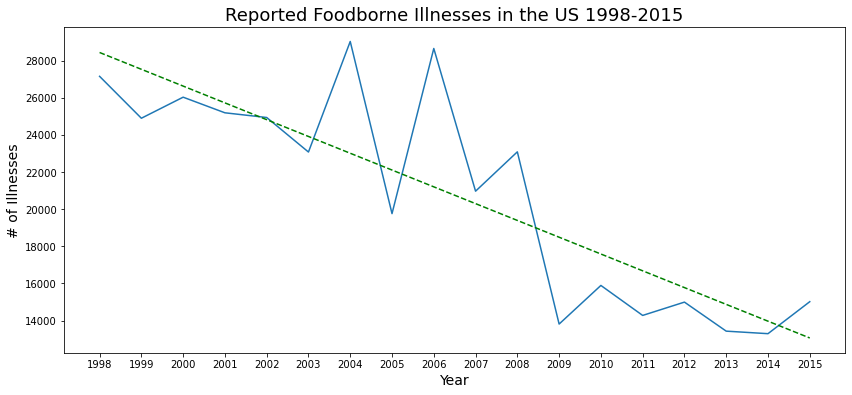

In [96]:
plt.figure(figsize=(14,6))

ill_trend=np.array(yr_outcomes_df['Illnesses'])
z=np.polyfit(yr_outcomes_df.index.values, ill_trend, 1)
p=np.poly1d(z)
plt.plot(yr_outcomes_df.index.values, yr_outcomes_df['Illnesses'])
plt.plot(yr_outcomes_df.index.values, p(yr_outcomes_df.index.values), 'g--')

plt.xticks(yr_outcomes_df.index.values)
plt.xlabel('Year', fontsize=14)
plt.ylabel("# of Illnesses", fontsize=14)
plt.title('Reported Foodborne Illnesses in the US 1998-2015', fontsize=18);

In [97]:
#In 2009, existing foodborne and waterborne disease outbreak surveillance systems were transitioned to an 
#enhanced reporting platform, the National Outbreak Reporting System (NORS)
#A new electronic reporting form and data entry interface were also introduced. In 2009, the 
#number of reported foodborne disease outbreaks declined 32% compared with the mean of the preceding 5 years.
#**Factors Contributing to Decline in Foodborne Disease Outbreak Reports, United States; 
#Emerg Infect Dis. 2014 Sep; 20(9): 1551–1553.

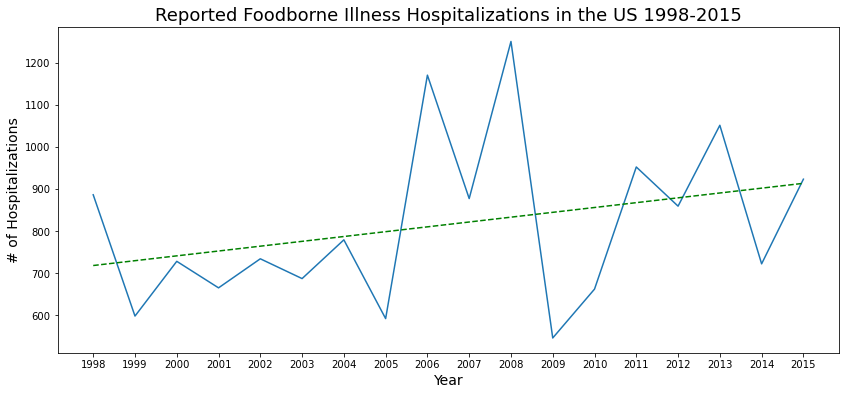

In [98]:
plt.figure(figsize=(14,6))

hosp_trend=np.array(yr_outcomes_df['Hospitalizations'])
z=np.polyfit(yr_outcomes_df.index.values, hosp_trend, 1)
p=np.poly1d(z)
plt.plot(yr_outcomes_df.index.values, yr_outcomes_df['Hospitalizations'])
plt.plot(yr_outcomes_df.index.values, p(yr_outcomes_df.index.values), 'g--')

plt.xticks(yr_outcomes_df.index.values)
plt.xlabel('Year', fontsize=14)
plt.ylabel("# of Hospitalizations", fontsize=14)
plt.title('Reported Foodborne Illness Hospitalizations in the US 1998-2015', fontsize=18);

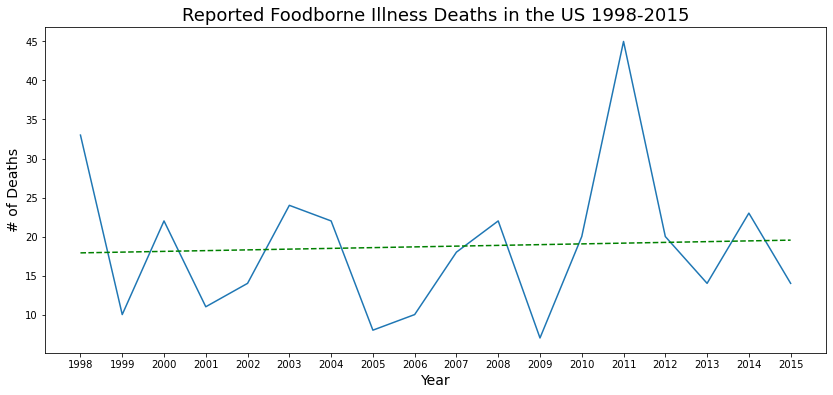

In [99]:
plt.figure(figsize=(14,6))

death_trend=np.array(yr_outcomes_df['Deaths'])
z=np.polyfit(yr_outcomes_df.index.values, death_trend, 1)
p=np.poly1d(z)
plt.plot(yr_outcomes_df.index.values, yr_outcomes_df['Deaths'])
plt.plot(yr_outcomes_df.index.values, p(yr_outcomes_df.index.values), 'g--')

plt.xticks(yr_outcomes_df.index.values)
plt.xlabel('Year', fontsize=14)
plt.ylabel("# of Deaths", fontsize=14)
plt.title('Reported Foodborne Illness Deaths in the US 1998-2015', fontsize=18);

### Drilldown by State

In [100]:
st_outcomes_df=occur_df.groupby(by='State').sum()
st_outcomes_df=st_outcomes_df.drop(columns='Month').drop(columns='Year')
st_outcomes_df=st_outcomes_df.sort_values('Illnesses', ascending=False).head(10)
st_outcomes_df

,Illnesses,Hospitalizations,Deaths
State,,,
California,39992,1062.0,26.0
Illinois,24700,713.0,5.0
Multistate,24573,4011.0,150.0
Florida,23050,684.0,23.0
Ohio,20451,659.0,8.0
New York,17407,591.0,12.0
Michigan,14471,357.0,5.0
Texas,14187,337.0,14.0
Minnesota,13533,373.0,3.0


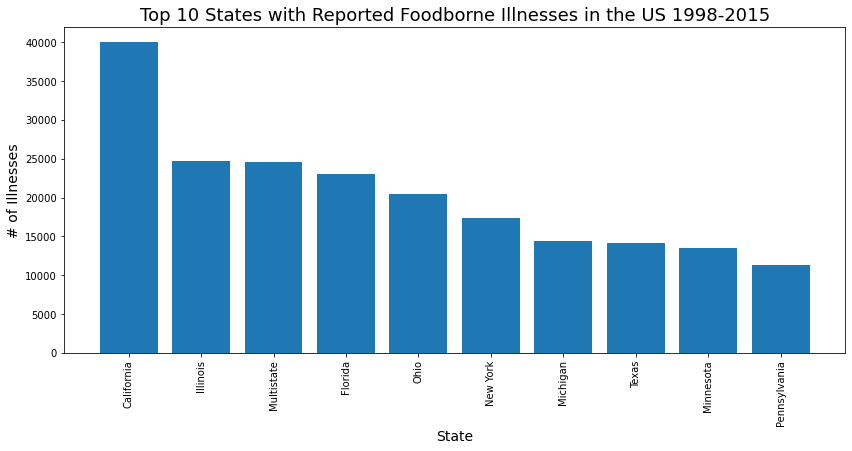

In [101]:
plt.figure(figsize=(14,6))
plt.bar(st_outcomes_df.index.values, st_outcomes_df['Illnesses'])

plt.xticks(st_outcomes_df.index.values, rotation=90)
plt.xlabel('State', fontsize=14)
plt.ylabel("# of Illnesses", fontsize=14)
plt.title('Top 10 States with Reported Foodborne Illnesses in the US 1998-2015', fontsize=18);

In [102]:
# The 10 Most Populous States In America For 2021
# California
# Texas
# Florida
# New York
# Pennsylvania
# Illinois
# Ohio
# Georgia
# North Carolina
# Michigan
#2 (Georgia and North Carolina) of the 10 most populous states are on the top 10 list for foodborne illness

### Drilldown by bug

In [104]:
bug_outcomes_df=occur_df.groupby(by='causative_agent').sum()
#bug_outcomes_df=occur_df.groupby(by='causative_agent').sum()
bug_outcomes_df=bug_outcomes_df.drop(columns='Month').drop(columns='Year')
bug_outcomes_df=bug_outcomes_df.sort_values('Illnesses', ascending=False).head(10)
bug_outcomes_df

,Illnesses,Hospitalizations,Deaths
causative_agent,,,
Norovirus,138618,1410.0,13.0
Salmonella,65140,7470.0,86.0
Clostridium,29578,274.0,22.0
Escherichia,12083,1981.0,35.0
Staphylococcus,8940,453.0,3.0
Shigella,8122,312.0,2.0
Campylobacter,8081,324.0,1.0
Bacillus,7160,75.0,3.0
Other - Virus,3034,24.0,0.0


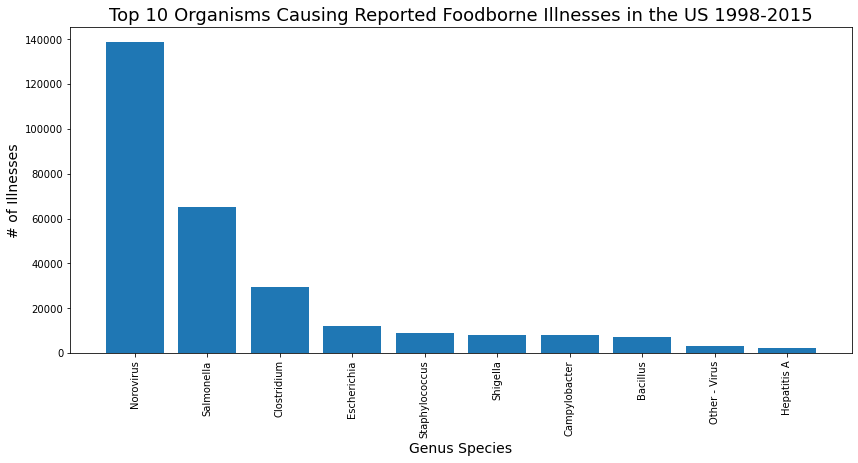

In [105]:
plt.figure(figsize=(14,6))
plt.bar(bug_outcomes_df.index.values, bug_outcomes_df['Illnesses'])

plt.xticks(bug_outcomes_df.index.values, rotation=90)
plt.xlabel('Genus Species', fontsize=14)
plt.ylabel("# of Illnesses", fontsize=14)
plt.title('Top 10 Organisms Causing Reported Foodborne Illnesses in the US 1998-2015', fontsize=18);

### Drilldown by Preparation

In [77]:
occur_df['Location of Preparation'].value_counts()

Restaurant - other or unknown type                                                                                                8125
Restaurant - Sit-down dining                                                                                                      2229
Private home/residence                                                                                                            1608
Caterer (food prepared off-site from where served)                                                                                1053
Other (describe in remarks)                                                                                                       1031
                                                                                                                                  ... 
Restaurant - "Fast-food"(drive up service or pay at counter); Restaurant - Sit-down dining; Restaurant - other or unknown type       1
Restaurant - Sit-down dining; Grocery store; Office/ind

In [78]:
loc_prep_df=occur_df.groupby(by='Location of Preparation').sum()
loc_prep_df=loc_prep_df.drop(columns='Month').drop(columns='Year')
loc_prep_df=loc_prep_df.sort_values('Illnesses', ascending=False).head(10)
loc_prep_df

,Illnesses,Hospitalizations,Deaths
Location of Preparation,,,
Restaurant - other or unknown type,104450,3498.0,41.0
Caterer (food prepared off-site from where served),34428,396.0,4.0
Other (describe in remarks),31345,1392.0,56.0
Restaurant - Sit-down dining,25075,1081.0,5.0
Private home/residence,20843,2317.0,75.0
Prison/jail,20551,165.0,4.0
School/college/university,19244,211.0,0.0
Banquet Facility (food prepared and served on-site),11630,77.0,1.0
Unknown,7648,389.0,5.0


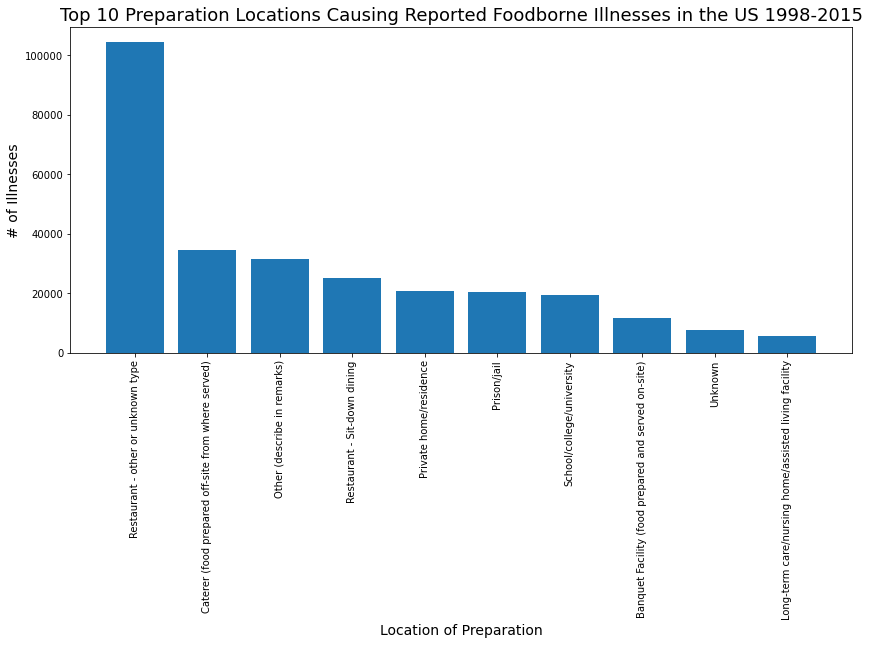

In [79]:
plt.figure(figsize=(14,6))
plt.bar(loc_prep_df.index.values, loc_prep_df['Illnesses'])

plt.xticks(loc_prep_df.index.values, rotation=90)
plt.xlabel('Location of Preparation', fontsize=14)
plt.ylabel("# of Illnesses", fontsize=14)
plt.title('Top 10 Preparation Locations Causing Reported Foodborne Illnesses in the US 1998-2015', fontsize=18);